<h1>Analysis of the cell cycle in HeLa S3 cells</h1>

In [1]:
#######imports and data read#######
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from pre_processing import *
from algorithms import *
from spectrum_gen import *
from data_gen import *
from analysis import *
from datasets import *
from evaluation import *
import h5py
import scanpy as sc
from sklearn.metrics import adjusted_rand_score
adata = sc.read_csv('hela/GSM4224315_out_gene_exon_tagged.dge_exonssf002_WT.txt', delimiter='\t').T



/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<h2>Standard pre-processing</h2> <br />
It is recomended to do not scale the data to zero mean

In [2]:
adata = shuffle_adata(adata)
adata = filter_cells_hela(adata)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata,n_top_genes=7000)


Trying to set attribute `.obs` of view, copying.
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/scanpy/preprocessing/_deprecated/highly_variable_genes.py:145: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


Plotting

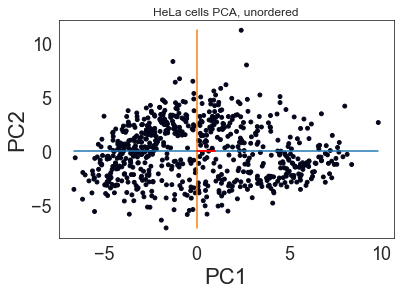

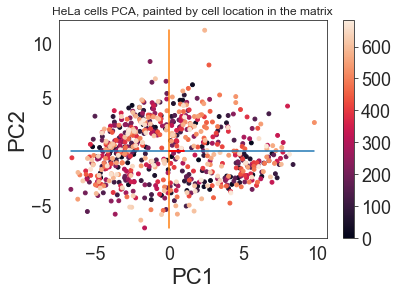

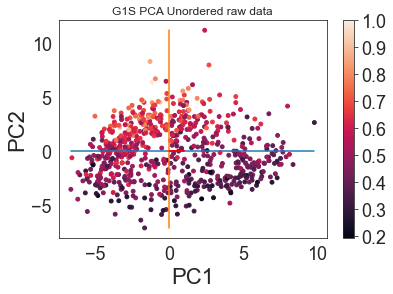

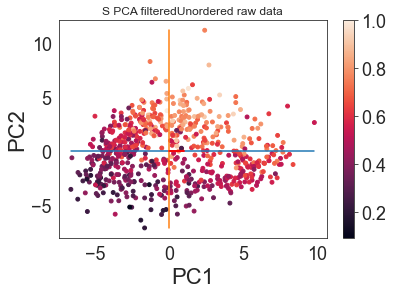

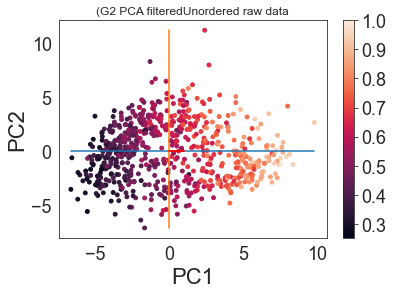

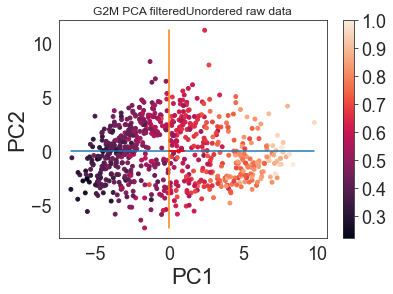

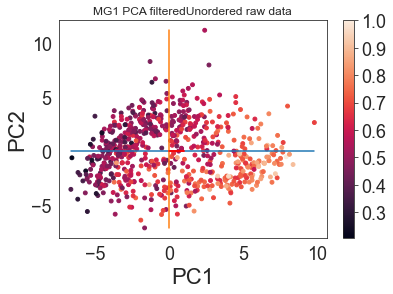

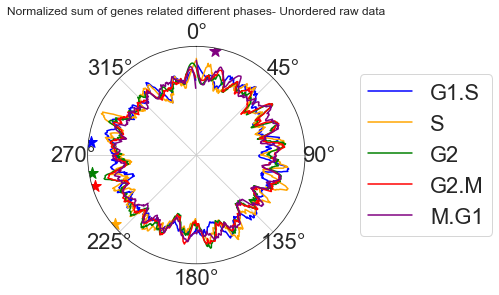

Circular mean and variance, G1S(-1.4490436606833415, 0.9865528114821364)
Circular mean and variance, S(-2.2766089946855232, 0.9871422665340188)
Circular mean and variance, G2(-1.7369700114242288, 0.9877472966561103)
Circular mean and variance, G2M(-1.864412066814619, 0.9917347928193625)
Circular mean and variance, MG1(0.17985633778794913, 0.9946741607847484)
Mean circular variance= 0.9895702656552752


In [3]:
ranged_pca_2d(adata.X,color=np.zeros(adata.X.shape[0]),title=("HeLa cells PCA, unordered"),dis_colorbar=True)
all_plots_hela(adata,title="Unordered raw data")


<h3>De novo- reconstruction</h3>

In [4]:
E_sga  , E_rec_sga = reconstruction_cyclic(adata.X , iterNum=250 , batch_size=6000)
sga_range= e_to_range(E_rec_sga)
adata = adata[sga_range,:]
orig_adata = copy.deepcopy(adata.copy())

Iteration number: 0 function value= 1.1949593650495935e-22
Iteration number: 25 function value= 551.7117231995013
Iteration number: 50 function value= 560.95941541208
Iteration number: 75 function value= 569.7939857436799
Iteration number: 100 function value= 577.5932262733447
Iteration number: 125 function value= 579.6540726648942
Iteration number: 150 function value= 580.0862172760992
Iteration number: 175 function value= 582.2909320744385
Iteration number: 200 function value= 584.7842012511911
Iteration number: 225 function value= 584.9007145034639


Plotting

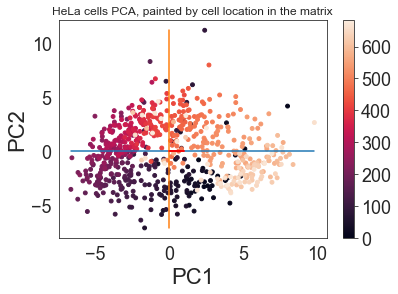

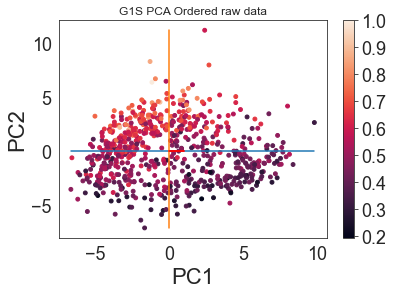

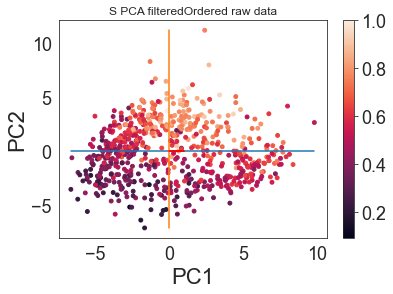

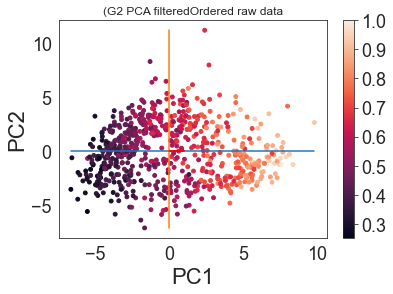

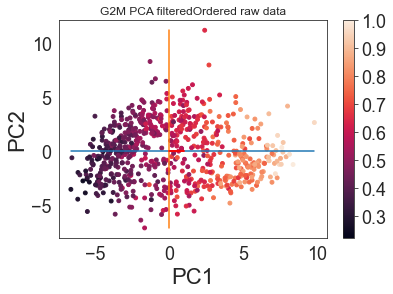

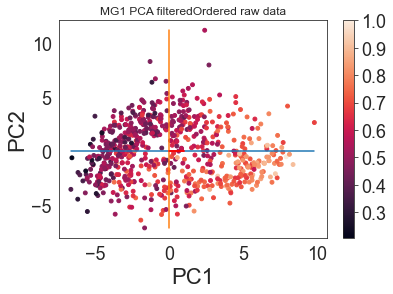

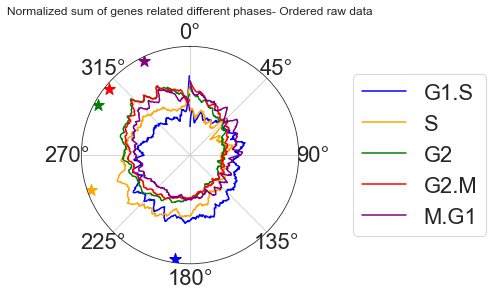

Circular mean and variance, G1S(-2.9985860840968326, 0.8910651369340772)
Circular mean and variance, S(-1.9099289398041153, 0.8244637300611032)
Circular mean and variance, G2(-1.0723569455871191, 0.8080905263784399)
Circular mean and variance, G2M(-0.8873998411037481, 0.8262099953076536)
Circular mean and variance, MG1(-0.4537609788987937, 0.8912682574892804)
Mean circular variance= 0.8482195292341108


In [5]:
all_plots_hela(adata,title="Ordered raw data")

<h3>Signal enhancement</h3>

Iteration number: 1 function value: 510.2535430727398
Iteration number: 26 function value: 1099.0956563059715
Iteration number: 51 function value: 2575.6466857093665
Iteration number: 76 function value: 3363.4785887105836


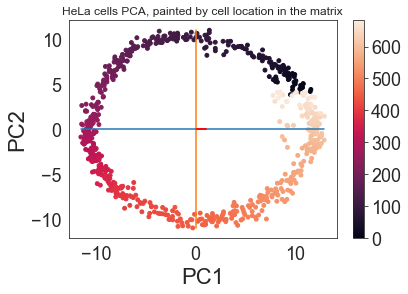

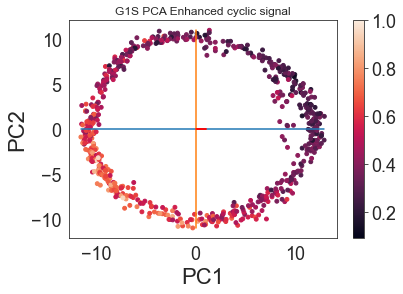

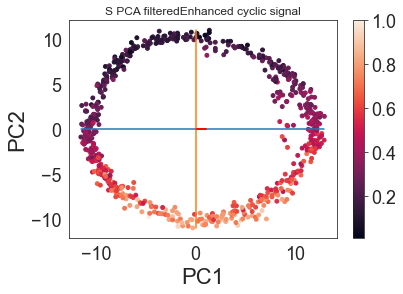

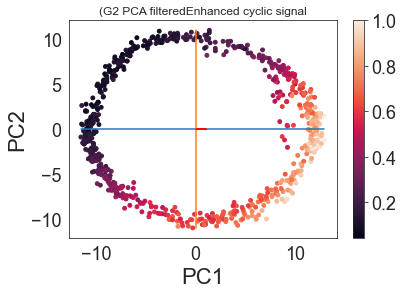

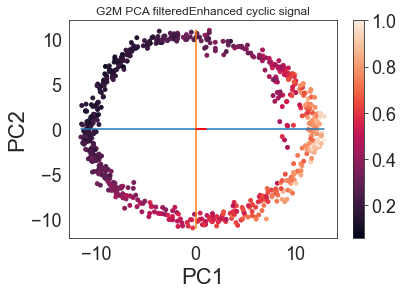

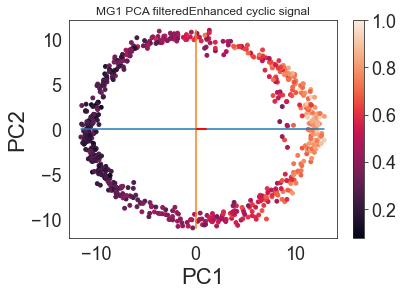

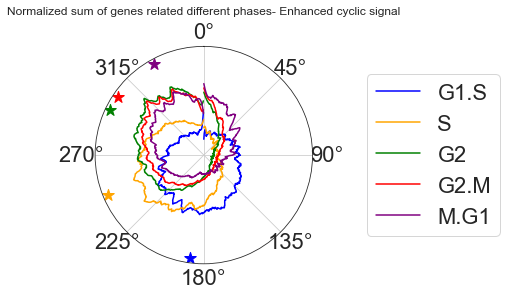

Circular mean and variance, G1S(-3.004663111122377, 0.7890673988756595)
Circular mean and variance, S(-1.9663503458135805, 0.6427731306404344)
Circular mean and variance, G2(-1.119790311867351, 0.5600492259469219)
Circular mean and variance, G2M(-0.9743286781740443, 0.6395988469428522)
Circular mean and variance, MG1(-0.4951989784808631, 0.698256714560286)
Mean circular variance= 0.6659490633932308


In [6]:
adata = orig_adata.copy()
F = enhancement_cyclic(adata.X,regu=0.05,iterNum=100)
adata.X = adata.X * F
all_plots_hela(adata,title="Enhanced cyclic signal")

<h3>Signal Filtering</h3>

starting filtering
25th Iteration    Loss :: 104.6891121743914 gradient :: 2.466289727362752
50th Iteration    Loss :: 50.578401768319964 gradient :: 1.2538982023370593
75th Iteration    Loss :: 33.63462899839068 gradient :: 0.8344141721273675
100th Iteration    Loss :: 25.594768585333213 gradient :: 0.622423286570628
125th Iteration    Loss :: 20.943378031253026 gradient :: 0.4955942213708303
150th Iteration    Loss :: 17.920074664229432 gradient :: 0.41201679740883085
175th Iteration    Loss :: 15.791282194443724 gradient :: 0.3531331001054284
200th Iteration    Loss :: 14.20339267810278 gradient :: 0.30951523723734453
225th Iteration    Loss :: 12.968835523433011 gradient :: 0.27600252405358866
250th Iteration    Loss :: 11.977891507681829 gradient :: 0.24950306720462714
275th Iteration    Loss :: 11.161749123499204 gradient :: 0.22804620934640554
300th Iteration    Loss :: 10.475415294910125 gradient :: 0.21030538991298783


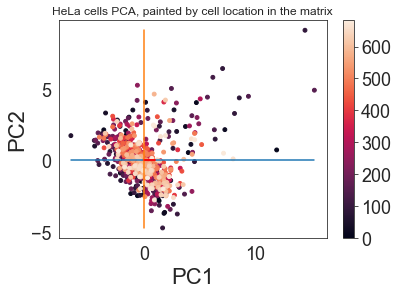

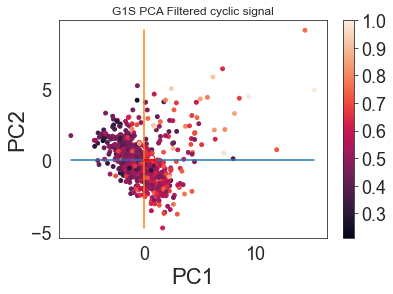

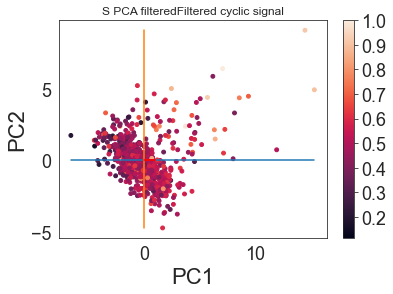

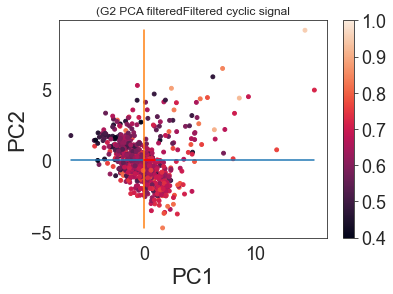

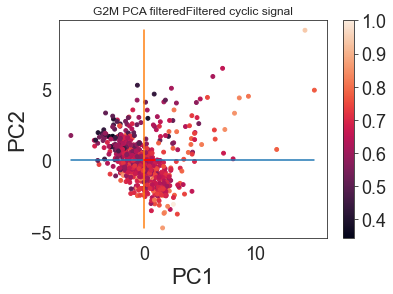

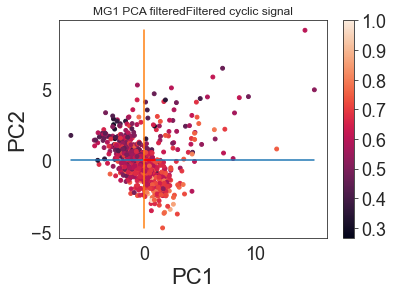

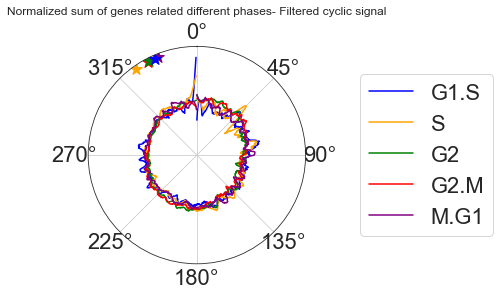

Circular mean and variance, G1S(-0.4110942321721581, 0.9947312732207788)
Circular mean and variance, S(-0.6157809457275494, 0.9896247426031478)
Circular mean and variance, G2(-0.4737737195319337, 0.9861754658453171)
Circular mean and variance, G2M(-0.4851845689146732, 0.9867402656141481)
Circular mean and variance, MG1(-0.379487332034358, 0.9876787865215914)
Mean circular variance= 0.9889901067609967


In [8]:
adata = copy.deepcopy(orig_adata.copy())
F = filtering_cyclic(adata.X,regu=0,iterNum=300)
adata.X = adata.X * F
all_plots_hela(adata,title="Filtered cyclic signal")
